# Project 3: NLP Classification of Two Topics (Marvel Cinematic Universe vs DC Extended Universe)

# 02: Data Cleaning and Initial Data Exploration

In this notebook, we will clean the data and conduct some initial data exploration.

## Import Libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [3]:
# Import Marvel data
marvel = pd.read_csv('../data/marvel.csv')

# Import DCEU data
dceu = pd.read_csv('../data/dceu.csv')

## Data Cleaning Part 1

In this section, we'll look at the data we have collected and select the columns we want to use.

By looking at the columns and the information contained, we will keep the following columns for our analysis while dropping the rest.

### Data Dictionary

Columns to keep:  
|Column| Use of column|
|------|--------------|
|selftext|This is the text residing in the post and is part of the main data we'll be using to train our model|
|subreddit|This is data label|
|title|This is the title of the post and is part of the main data we'll be using to train our model|
|

### Initial Data Cleaning

In [4]:
# Take a quick look at the columns and information in each column for Marvel
marvel.head(3)

,all_awardings,allow_live_comments,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_gild,category,content_categories,contest_mode,created_utc,discussion_type,distinguished,domain,edited,edited_on,gallery_data,gilded,gildings,hidden,hide_score,id,is_created_from_ads_ui,is_crosspostable,is_gallery,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_metadata,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,quarantine,removed_by,removed_by_category,retrieved_utc,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,top_awarded_type,total_awards_received,treatment_tags,updated_utc,upvote_ratio,url,url_overridden_by_dest,utc_datetime_str,view_count,whitelist_status,wls
0,[],False,False,NotGodsThrowaway,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_qz0qszo4,False,False,[],True,NaN,NaN,False,1677980039,NaN,NaN,i.redd.it,False,NaN,NaN,0,{},False,True,11ijqix,False,True,NaN,False,False,True,True,False,False,#0087d2,Discuss,"[{'e': 'text', 't': 'Discussion'}]",d556a05a-43fb-11e8-82a6-0e6ba3dc5484,Discussion,light,richtext,False,NaN,{},NaN,False,True,0,0,False,all_ads,/r/marvelstudios/comments/11ijqix/i_hope_layla...,False,image,{'images': [{'source': {'url': 'https://previe...,6,False,NaN,NaN,1677980056,1,NaN,{},NaN,True,False,False,marvelstudios,t5_2uii8,r/marvelstudios,3066270,public,confidence,https://b.thumbs.redditmedia.com/gzEL6you86w9J...,59.0,140.0,I hope Layla comes back. Her introduction as t...,NaN,0,[],1677980057,1.0,https://i.redd.it/lrrz7hw7qtla1.png,https://i.redd.it/lrrz7hw7qtla1.png,2023-03-05 01:33:59,NaN,all_ads,6
1,[],False,False,Louis_DCVN,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_6db17i0l,False,False,[],True,NaN,NaN,False,1677979927,NaN,NaN,variety.com,False,NaN,NaN,0,{},False,True,11ijoz3,False,True,NaN,False,False,False,True,False,False,#bb18d7,Article,"[{'e': 'text', 't': 'Article'}]",0ee036fc-28fb-11ea-bbf1-0ee82508daf1,Article,light,richtext,False,NaN,{},NaN,False,True,0,0,False,all_ads,/r/marvelstudios/comments/11ijoz3/ryan_reynold...,False,link,{'images': [{'source': {'url': 'https://extern...,6,False,NaN,NaN,1677979941,1,NaN,{},NaN,True,False,False,marvelstudios,t5_2uii8,r/marvelstudios,3066271,public,confidence,https://b.thumbs.redditmedia.com/xUpusRYnpvt7l...,78.0,140.0,Ryan Reynolds Casts Doubt on 'Free Guy' Sequel...,NaN,0,[],1677979942,1.0,https://variety.com/2023/film/global/ryan-reyn...,https://variety.com/2023/film/global/ryan-reyn...,2023-03-05 01:32:07,NaN,all_ads,6
2,[],False,False,anthonystrader18,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_1or2xht2,False,False,[],True,NaN,NaN,False,1677977799,NaN,NaN,i.redd.it,False,NaN,NaN,0,{},False,True,11iiw55,False,True,NaN,False,False,True,True,False,False,#0087d2,Discuss,"[{'e': 'text', 't': 'Discussion'}]",d556a05a-43fb-11e8-82a6-0e6ba3dc5484,Discussion,light,richtext,False,NaN,{},NaN,False,True,0,0,False,all_ads,/r/marvelstudios/comments/11iiw55/what_does_ev...,False,image,{'images': [{'source': {'url': 'https://previe...,6,False,NaN,NaN,1677977810,1,NaN,{},NaN,True,False,False,marvelstudios,t5_2uii8,r/marvelstudios,3066263,public,confidence,https://b.thumbs.redditmedia.com/TX1ruc0zUy7dv...,140.0,140.0,What Does Everyone think of Dr Strange Multive...,NaN,0,[],1677977810,1.0,https://i.redd.it/se7so83i1vla1.jpg,https://i.redd.it/se7so83i1vla1.jpg,2023-03-05 00:56:39,NaN,all_ads,6


In [5]:
# Take a quick look at the columns and information in each column for DCEU
dceu.head(3)

,all_awardings,allow_live_comments,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_gild,category,content_categories,contest_mode,created_utc,crosspost_parent,crosspost_parent_list,discussion_type,distinguished,domain,edited,edited_on,gallery_data,gilded,gildings,hidden,hide_score,id,is_created_from_ads_ui,is_crosspostable,is_gallery,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_metadata,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,poll_data,post_hint,preview,pwls,quarantine,removed_by,removed_by_category,retrieved_utc,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,top_awarded_type,total_awards_received,treatment_tags,updated_utc,upvote_ratio,url,url_overridden_by_dest,utc_datetime_str,view_count,whitelist_status,wls
0,[],False,False,Louis_DCVN,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_6db17i0l,False,False,[],True,NaN,NaN,False,1677979634,NaN,NaN,NaN,NaN,variety.com,False,NaN,NaN,0,{},False,True,11ijl1a,False,True,NaN,False,False,False,True,False,False,#ea0027,news,[],ff1bbabe-5d95-11e5-8d28-0ead67bd777b,NEWS,light,text,False,NaN,{},NaN,False,True,0,0,False,all_ads,/r/DC_Cinematic/comments/11ijl1a/green_lantern...,False,NaN,link,{'images': [{'source': {'url': 'https://extern...,6,False,NaN,NaN,1677979649,1,NaN,{},NaN,True,False,False,DC_Cinematic,t5_2ykm6,r/DC_Cinematic,376363,public,NaN,https://b.thumbs.redditmedia.com/xUpusRYnpvt7l...,78.0,140.0,"Green Lantern 2011, which also starred Lively,...",NaN,0,[],1677979650,1.0,https://variety.com/2023/film/global/ryan-reyn...,https://variety.com/2023/film/global/ryan-reyn...,2023-03-05 01:27:14,NaN,all_ads,6
1,[],False,False,AldebaranTauro,NaN,NaN,tacbatman,[],NaN,NaN,dark,text,t2_7k9iqm7,False,False,[],True,NaN,NaN,False,1677976528,NaN,NaN,NaN,NaN,i.redd.it,False,NaN,NaN,0,{},False,True,11iievr,False,True,NaN,False,False,True,True,False,False,#ff66ac,merchandise,[],bf96d4b6-5edd-11e5-9e15-129e4297eb59,MERCHANDISE,light,text,False,NaN,{},NaN,False,True,0,0,False,all_ads,/r/DC_Cinematic/comments/11iievr/new_look_at_f...,False,NaN,image,{'images': [{'source': {'url': 'https://previe...,6,False,NaN,NaN,1677976550,1,NaN,{},NaN,True,False,False,DC_Cinematic,t5_2ykm6,r/DC_Cinematic,376365,public,NaN,https://a.thumbs.redditmedia.com/Y-eywtB0nhB_v...,140.0,140.0,New look at Funko Pops of young Barry in impro...,NaN,0,[],1677976551,1.0,https://i.redd.it/sd0kj0e6gtla1.jpg,https://i.redd.it/sd0kj0e6gtla1.jpg,2023-03-05 00:35:28,NaN,all_ads,6
2,[],False,False,Illustrious-Sign3015,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_91yyd27r,False,False,[],True,NaN,NaN,False,1677975350,NaN,NaN,NaN,NaN,i.redd.it,False,NaN,NaN,0,{},False,True,11ihy29,False,True,NaN,False,False,True,True,False,False,#ff4500,humor,[],f58866c8-5d95-11e5-bb0f-0e4ee382cd79,HUMOR,light,text,False,NaN,{},NaN,False,True,0,0,False,all_ads,/r/DC_Cinematic/comments/11ihy29/if_the_joker_...,False,NaN,image,{'images': [{'source': {'url': 'https://previe...,6,False,NaN,NaN,1677975364,1,NaN,{},NaN,True,False,False,DC_Cinematic,t5_2ykm6,r/DC_Cinematic,376366,public,NaN,https://b.thumbs.redditmedia.com/Q7rMw3p_pk2i4...,78.0,140.0,If the Joker got his hands on the Ecto 1 from ...,NaN,0,[],1677975364,1.0,https://i.redd.it/md8gzcv7uula1.jpg,https://i.redd.it/md8gzcv7uula1.jpg,2023-03-05 00:15:50,NaN,all_ads,6


In [6]:
# Drop all the columns we don't need in the Marvel data
marvel = marvel[['subreddit', 'title', 'selftext']]

In [7]:
# Rename the selftext column as text
marvel = marvel.rename(columns={'selftext' : 'text'})

In [8]:
# Check the Marvel data
marvel.head()

,subreddit,title,text
0,marvelstudios,I hope Layla comes back. Her introduction as t...,NaN
1,marvelstudios,Ryan Reynolds Casts Doubt on 'Free Guy' Sequel...,NaN
2,marvelstudios,What Does Everyone think of Dr Strange Multive...,NaN
3,marvelstudios,Cast this movie with Earth’s Mightiest Muppets,NaN
4,marvelstudios,Okay but hear me out…,NaN


In [9]:
# Drop all the columns we don't need in the DCEU data
dceu = dceu[['subreddit', 'title', 'selftext']]

In [10]:
# Rename the selftext column as text
dceu = dceu.rename(columns={'selftext' : 'text'})

In [11]:
# Check the DCEU data
dceu.head()

,subreddit,title,text
0,DC_Cinematic,"Green Lantern 2011, which also starred Lively,...",NaN
1,DC_Cinematic,New look at Funko Pops of young Barry in impro...,NaN
2,DC_Cinematic,If the Joker got his hands on the Ecto 1 from ...,NaN
3,DC_Cinematic,r/antiwork users after that one guy killed the...,NaN
4,DC_Cinematic,'Shazam! Fury of the Gods' full credits are in...,Warner Bros. released a bunch of Shazam! Fury ...


## Exploratory Data Analysis (EDA) Part 1

We'll next proceeed to conduct a simple EDA on the data collected before cleaning and processing them. 

In [12]:
# Check the dataframe types
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  999 non-null    object
 1   title      999 non-null    object
 2   text       520 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


In [13]:
# Check for null values
marvel.isnull().sum()

subreddit      0
title          0
text         479
dtype: int64

In [14]:
# Check the dataframe types
dceu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1000 non-null   object
 1   title      1000 non-null   object
 2   text       288 non-null    object
dtypes: object(3)
memory usage: 23.6+ KB


In [15]:
# Check for null values
dceu.isnull().sum()

subreddit      0
title          0
text         712
dtype: int64

From the checks above, we can see that a lot of the posts from both Marvel and DCEU have empty text columns. This is because of the following reasons:
1. The information intended to be shared is already included in the title.
2. The text column contained pictures, memes or videos rather than text, which was filtered out when the pushshift API scrapped the posts. 

As some posts still contain information in the text column, we will keep this column and use the data inside to train our model.

### Distribution of Posts Title/Text length and word count

From the distributions below, we can observe the following:  
* Post Title Lengths: The lengths for the titles are generally between 20 - 100 letters. There are some outliers, going up to 250 - 300 letters.  
* Post Text Lengths: Most of the text in the posts have between 0 - 1000 letters. There are some outliers, going up to 2000 - 4000 letters.  
* Post Title Word Count: The distributions are quite similar, with the word count for titles being between 2 - 20 words
* Post Text Word Count: Most of the posts contain between 0 - 200 words, which is quite common for forums such as reddit. 

In [16]:
# Initialize a dataframe to store the additional EDA data for Marvel and DCEU
eda_df = pd.DataFrame()

In [17]:
# Calculate the number of letters (length) for the titles and text from the posts of Marvel and DCEU
eda_df['marvel_title_length'] = marvel['title'].map(len)
eda_df['marvel_text_length'] = marvel['text'].dropna().map(len)
eda_df['dceu_title_length'] = dceu['title'].map(len)
eda_df['dceu_text_length'] = dceu['text'].dropna().map(len)

In [18]:
# Calculate the word count for the titles and text from the posts of Marvel and DCEU
eda_df['marvel_title_word_count'] = marvel['title'].map(lambda x: len(x.split()))
eda_df['marvel_text_word_count'] = marvel['text'].dropna().map(lambda x: len(x.split()))
eda_df['dceu_title_word_count'] = dceu['title'].map(lambda x: len(x.split()))
eda_df['dceu_text_word_count'] = dceu['text'].dropna().map(lambda x: len(x.split()))

In [19]:
# Take a quick look at the data
eda_df.head()

,marvel_title_length,marvel_text_length,dceu_title_length,dceu_text_length,marvel_title_word_count,marvel_text_word_count,dceu_title_word_count,dceu_text_word_count
0,123,NaN,144,NaN,23,NaN,23,NaN
1,68,NaN,65,NaN,11,NaN,12,NaN
2,60,NaN,58,NaN,10,NaN,12,NaN
3,46,NaN,68,NaN,7,NaN,12,NaN
4,21,NaN,79,538.0,5,NaN,13,62.0


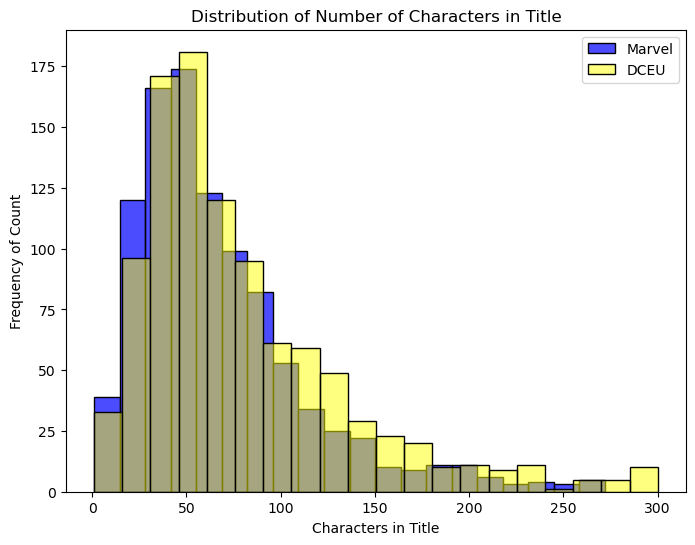

In [20]:
# Create a histogram plot to view the distribution of the number of characters in the title
plt.figure(figsize=(8, 6))
sns.histplot(eda_df['marvel_title_length'], kde=False, bins=20, label="Marvel", 
             color="blue", alpha = 0.7)

sns.histplot(eda_df['dceu_title_length'], kde=False, bins=20, label="DCEU", 
             color="yellow", alpha = 0.5)

plt.title("Distribution of Number of Characters in Title")
plt.xlabel("Characters in Title")
plt.ylabel("Frequency of Count")
plt.legend();

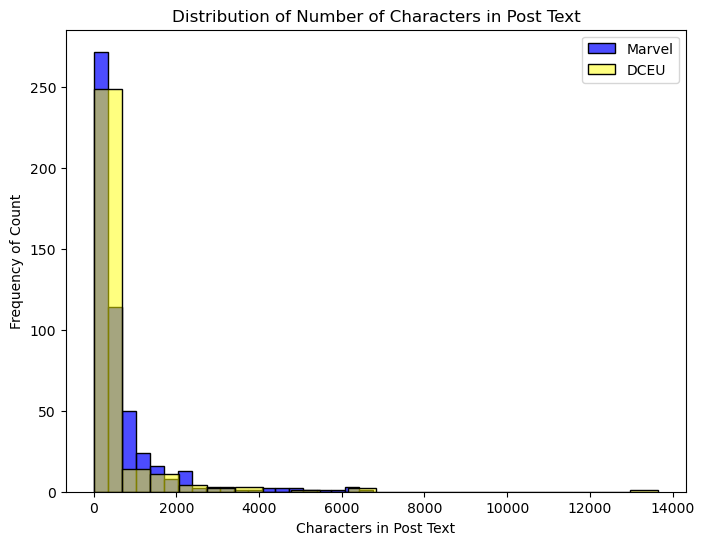

In [21]:
# Create a histogram plot to view the distribution of the number of characters in the post text
plt.figure(figsize=(8, 6))
sns.histplot(eda_df['marvel_text_length'], kde=False, bins=20, label="Marvel", 
             color="blue", alpha = 0.7)

sns.histplot(eda_df['dceu_text_length'], kde=False, bins=20, label="DCEU", 
             color="yellow", alpha = 0.5)

plt.title("Distribution of Number of Characters in Post Text")
plt.xlabel("Characters in Post Text")
plt.ylabel("Frequency of Count")
plt.legend();

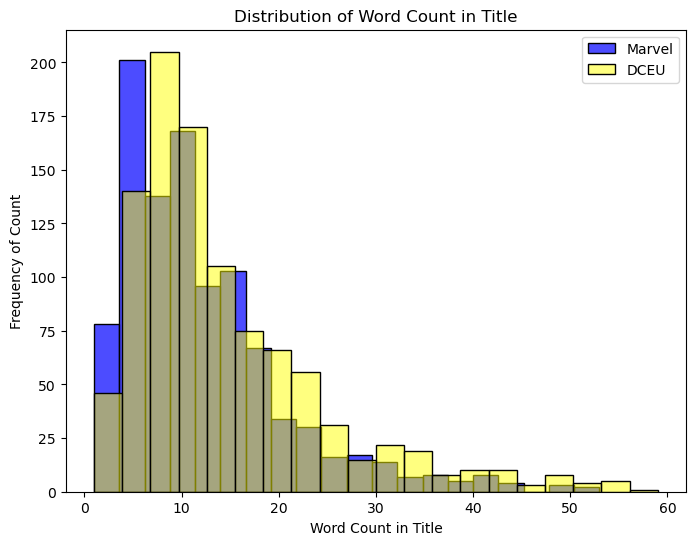

In [22]:
# Create a histogram plot to view the distribution of the word count in the title
plt.figure(figsize=(8, 6))
sns.histplot(eda_df['marvel_title_word_count'], kde=False, bins=20, label="Marvel", 
             color="blue", alpha = 0.7)

sns.histplot(eda_df['dceu_title_word_count'], kde=False, bins=20, label="DCEU", 
             color="yellow", alpha = 0.5)

plt.title("Distribution of Word Count in Title")
plt.xlabel("Word Count in Title")
plt.ylabel("Frequency of Count")
plt.legend();

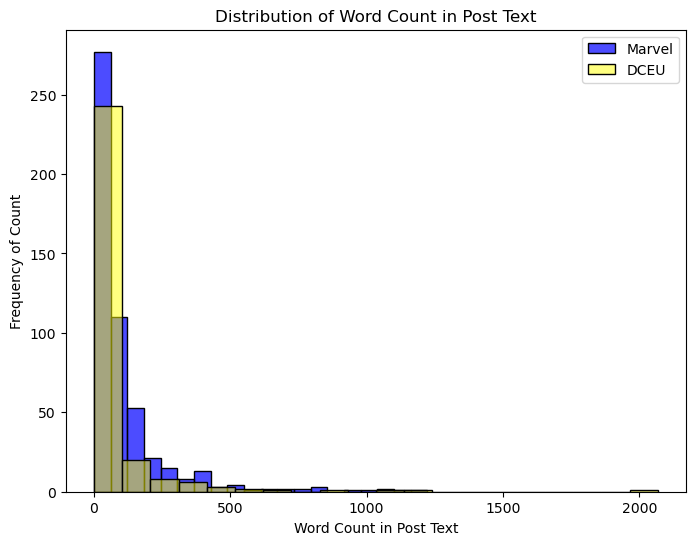

In [23]:
# Create a histogram plot to view the distribution of the Word Count in the Post Text
plt.figure(figsize=(8, 6))
sns.histplot(eda_df['marvel_text_word_count'], kde=False, bins=20, label="Marvel", 
             color="blue", alpha = 0.7)

sns.histplot(eda_df['dceu_text_word_count'], kde=False, bins=20, label="DCEU", 
             color="yellow", alpha = 0.5)

plt.title("Distribution of Word Count in Post Text")
plt.xlabel("Word Count in Post Text")
plt.ylabel("Frequency of Count")
plt.legend();

In [24]:
# Filter out posts with less than 500 words
eda_marvel_df = eda_df.loc[eda_df['marvel_text_word_count'] > 500]
eda_dceu_df = eda_df.loc[eda_df['dceu_text_word_count'] > 500]

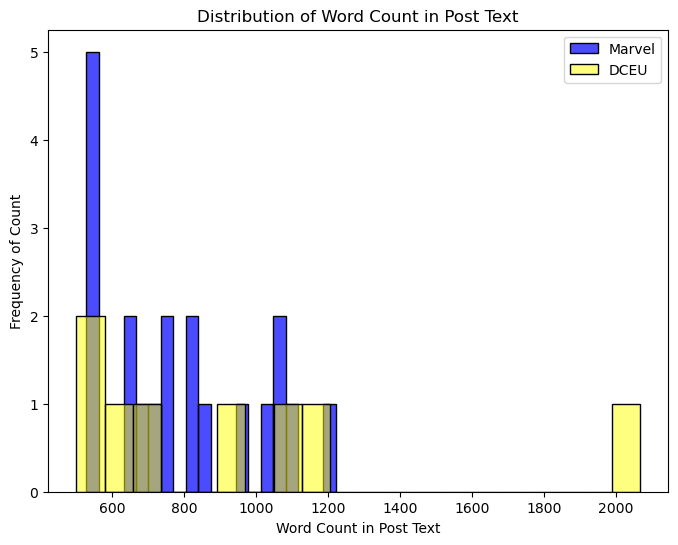

In [25]:
# Create a histogram plot to view the distribution of the Word Count in the Post Text with more than 500 words
plt.figure(figsize=(8, 6))
sns.histplot(eda_marvel_df['marvel_text_word_count'], kde=False, bins=20, label="Marvel", 
             color="blue", alpha = 0.7)

sns.histplot(eda_dceu_df['dceu_text_word_count'], kde=False, bins=20, label="DCEU", 
             color="yellow", alpha = 0.5)

plt.title("Distribution of Word Count in Post Text")
plt.xlabel("Word Count in Post Text")
plt.ylabel("Frequency of Count")
plt.legend();

## Data Cleaning Part 2

There are a lot of post text that have null values. These might cause problems later when we try to train our model. Hence, we will convert all the null values to '-', which will be dropped when we pre-process the text data.

In [26]:
# Replace all null values with '-'
marvel['text'].fillna('-', inplace=True)
dceu['text'].fillna('-', inplace=True)

In [27]:
# Check if there are any null values remaining
marvel.isnull().sum()

subreddit    0
title        0
text         0
dtype: int64

In [28]:
# Check if there are any null values remaining
dceu.isnull().sum()

subreddit    0
title        0
text         0
dtype: int64

In [29]:
# There are also some rows with text [removed]. We will need to clean these up as well
marvel.loc[marvel['text'] == '[removed]'].head()

,subreddit,title,text
7,marvelstudios,Antman 3 was good.,[removed]
27,marvelstudios,"Can you imagine Thanos yelling ""I Am Thanos""?",[removed]
31,marvelstudios,What are your favorite Fan-made Awesome Mixes?,[removed]
33,marvelstudios,Is it believable that the Emil Blonsky from Th...,[removed]
43,marvelstudios,Michael Fassbender as Dr Doom?,[removed]


In [30]:
# There are also some rows with text [removed]. We will need to clean these up as well
dceu.loc[dceu['text'] == '[removed]'].head()

,subreddit,title,text
8,DC_Cinematic,Dc should let Snyder finish his vision.,[removed]
11,DC_Cinematic,Dc should let Snyder finish his vision.,[removed]
13,DC_Cinematic,Dc should let Snyder finish his vision.,[removed]
23,DC_Cinematic,Why did Warner Bros.Pictures not do Ben Afflec...,[removed]
33,DC_Cinematic,"In Superman: Legacy, Lois and Clark should hav...",[removed]


In [31]:
# Replace all rows that have '[removed]' with '-'
marvel['text'] = marvel['text'].map(lambda x: '-' if x == '[removed]' else x)
dceu['text'] = dceu['text'].map(lambda x: '-' if x == '[removed]' else x)

In [32]:
# There are also some rows with text [deleted]. We will need to clean these up as well
marvel.loc[marvel['text'] == '[deleted]'].head()

,subreddit,title,text
42,marvelstudios,"What was the best start to a Phase? For P4, I'...",[deleted]
198,marvelstudios,Did loki know that he caused his mother's death?,[deleted]
380,marvelstudios,Quantumania is actually a really good movie.,[deleted]
394,marvelstudios,Steven Yeun as THE SENTRY,[deleted]
403,marvelstudios,MCU had a multitude of powerful callbacks to i...,[deleted]


In [33]:
# There are also some rows with text [deleted]. We will need to clean these up as well
dceu.loc[dceu['text'] == '[deleted]'].head()

,subreddit,title,text
215,DC_Cinematic,Bill Hader As Harvey Dent/Two-Face for the Ree...,[deleted]
247,DC_Cinematic,My Fan-Casts for Matt Reeves Batman Sequel(s) ...,[deleted]
250,DC_Cinematic,Bill Hader As Harvey Dent/Two-Face For Matt Re...,[deleted]
251,DC_Cinematic,Bill Hader As Harvey Dent/Two-Face,[deleted]
680,DC_Cinematic,THR: Shazam Fury of the Gods Tracking for Low-...,[deleted]


In [34]:
# Replace all rows that have '[deleted]' with '-'
marvel['text'] = marvel['text'].map(lambda x: '-' if x == '[deleted]' else x)
dceu['text'] = dceu['text'].map(lambda x: '-' if x == '[deleted]' else x)

In [35]:
# Check for duplicated posts
marvel.duplicated().sum()

11

In [36]:
# Take a look at the duplicated content
marvel[marvel.duplicated()]

,subreddit,title,text
104,marvelstudios,"Went to Avengers Station today, here are some ...",-
219,marvelstudios,My version for Civil War Trailer 1 Theme on drums,-
307,marvelstudios,The Cast of Avengers: The Kang Dynasty,This cast list will continue to be updated as ...
312,marvelstudios,"To commemorate 15 years of the MCU, Titan Book...",-
357,marvelstudios,Is Kang the conqueror the main villain?,-
396,marvelstudios,Marvel Movie March Madness (Round of 32) - #1 ...,-
403,marvelstudios,MCU had a multitude of powerful callbacks to i...,-
536,marvelstudios,Is it just me or does this shot of Elizabeth O...,-
552,marvelstudios,Fan art of female Thanos (I know its not fully...,-
835,marvelstudios,ALL IRON MAN ARMORS (2008-2019) /Todas las arm...,-


There is no obvious duplicated content when we look at the title and text. Hence, we will keep all the rows for Marvel.

In [37]:
# Check for duplicated posts
dceu.duplicated().sum()

42

In [38]:
# Take a look at the duplicated content
dceu[dceu.duplicated()]

,subreddit,title,text
11,DC_Cinematic,Dc should let Snyder finish his vision.,-
13,DC_Cinematic,Dc should let Snyder finish his vision.,-
84,DC_Cinematic,In the case that Chris Pratt reunites with Jam...,-
146,DC_Cinematic,Should Superman be sexy?,-
196,DC_Cinematic,Ben Affleck is rumoured to be directing ‘THE B...,-
215,DC_Cinematic,Bill Hader As Harvey Dent/Two-Face for the Ree...,-
223,DC_Cinematic,How about you Restore some bitches?,-
229,DC_Cinematic,Why don't people talk about Shazam 2: Fury of ...,-
284,DC_Cinematic,Drawing every live-action Batman Part 7: Rober...,-
294,DC_Cinematic,Would Jenna Ortega make a good Raven?,-


There is clear duplication for some of the rows under the DCEU dataset. Hence, we will drop the duplicated posts.

In [39]:
# Drop the duplicated posts under DCEU
dceu.drop_duplicates(inplace=True)

In [40]:
# Check the number of rows
dceu.shape

(958, 3)

41 rows for DCEU were dropped due to duplication of posts. 

## Export the Cleaned Data

In [41]:
# Export the cleaned data into csv files
marvel.to_csv('../data/marvel_clean.csv', index=False)
dceu.to_csv('../data/dceu_clean.csv', index=False)

## Next step

With this, we have completed the initial EDA and cleaning. We can proceed with the data pre-processing and exploratory data analysis in the next notebook.